In [178]:
from langgraph.graph import StateGraph , START , END
from langchain_openai import OpenAI
from typing import  TypedDict

print("Hello")


Hello


In [179]:
def calculator_bmi(State:BMIState) -> BMIState:

    height   = State["height_m"]
    weight  = State["weight_kg"]

    bmi  =  weight / (height ** 2)

    State["bmi"] = bmi


    return  State

    

In [180]:
def label_bmi(State:BMIState) -> BMIState:

    bmi  =  State["bmi"]
    if bmi < 18.5:
        State["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        State["category"] = "Normal weight"
    elif 25 <= bmi < 30:
        State["category"] = "Overweight"
    else:
        State["category"] = "Obese"


    return  State

In [181]:
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str  
    

In [182]:
# define graph
graph = StateGraph(BMIState)

# define nodes
graph.add_node("calculator_bmi",calculator_bmi)
graph.add_node("label_bmi",label_bmi)

#add edges
graph.add_edge(START, "calculator_bmi")
graph.add_edge("calculator_bmi", "label_bmi")
graph.add_edge("label_bmi", END)

# compile graph
workflow  =  graph.compile()

# run graph



output = workflow.invoke({"weight_kg": 80, "height_m": 2.73})
print(output)


{'weight_kg': 80, 'height_m': 2.73, 'bmi': 10.734076668142603, 'category': 'Underweight'}


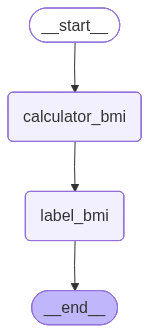

In [183]:
from IPython.display import display, Image
Image(workflow.get_graph().draw_mermaid_png())
